## 1. import dependencies

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv 
import numpy as np 
import os 

In [3]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
astunparse                   1.6.3
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
flatbuffers                  23.5.26
gast                         0.5.4
google-auth                  2.23.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.9.0
idna                         3.4
keras                        2.8.0
Keras-Preprocessing          1.1.2
libclang                     16.0.6
Markdown                     3.4.4
MarkupSafe                   2.1.3
numpy                        1.26.0
oauthlib                     3.2.2
opt-einsum                   3.3.0
pip                          23.2.1
protobuf                     3.19.6
pyasn1                       0.5.0
pyasn1-modules               0.3.0
requests                     2.31.0
req

In [5]:
#using os 
#join paths 
print(os.path.join("ayman", "mohamed", "abdallah"))

#list files in paricular directions 
os.listdir("Images/")

ayman\mohamed\abdallah


['happy', 'sad']

## 2. Remove images that mis-extended or may have incorrecr extension applied 

In [2]:
import imghdr

In [3]:
data_dir = 'data' #folder that has happy and sad folders 

In [6]:
os.listdir(data_dir)

['happy people', 'sad people']

In [7]:
#join paths 
os.listdir(os.path.join(data_dir, 'happy people')) #Get all happy images 

['05-12-21-happy-people.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '2560px-Happy_People.jpg',
 '56f455011e0000b300705475.jpeg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'dv2051009.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-454356720.jpg',
 'GettyImages-871518740.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35581971.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'group-of-happy-people-2.jpg',
 'group-people-posing-photo-with-words-happy-bottom_577115

In [8]:
img_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [19]:
img_path =os.path.join(data_dir, 'happy people', 'Happy-Guy.jpg')
img = plt.imread(img_path)

In [18]:
#Remove 
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        try: 
            # get image extension
            extn = imghdr.what(img_path)

            if extn not in img_exts:
                print(f"image {img_path} extension not in ext list")

                # remove image
                os.remove(img_path)
        except Exception as e :
             print(f"some issues with image {img_path}")
            

image data\happy people\happiness_thumbnail.jpg extension not in ext list
image data\happy people\Happy20People.jpg extension not in ext list
image data\happy people\how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp extension not in ext list
image data\happy people\traitshappypeople.jpg extension not in ext list
image data\sad people\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg extension not in ext list
image data\sad people\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg extension not in ext list
image data\sad people\depositphotos_86851530-stock-photo-close-up-of-african-young.jpg extension not in ext list
image data\sad people\very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg extension not in ext list


## 3. Load Data using Keras Utils

In [21]:
'''
Aumatically load files and label data according to files 
'''

'\nAumatically load files and label data according to files \n'

In [20]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [22]:
data = tf.keras.utils.image_dataset_from_directory('data') # data pipline

Found 195 files belonging to 2 classes.


In [24]:
#its a generator so we can not do this data[0], we need before convert it to numpy array 
# so we can access this pipline 
data_iterator = data.as_numpy_iterator() #return batches

In [36]:
# Get another batch from iterator run this cell 
batch = data_iterator.next() 

In [27]:
len(batch) # output is 2 means 2 parts first for images second for labels  

2

In [29]:
# images represented as numpy array

batch[0].shape # (32, 256, 256, 3) each batch contain 32 images with size 256, 256, 3

(32, 256, 256, 3)

In [30]:
# labels
# Class 1 -> Sad people
# Class 0 -> Happy people
batch[1]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

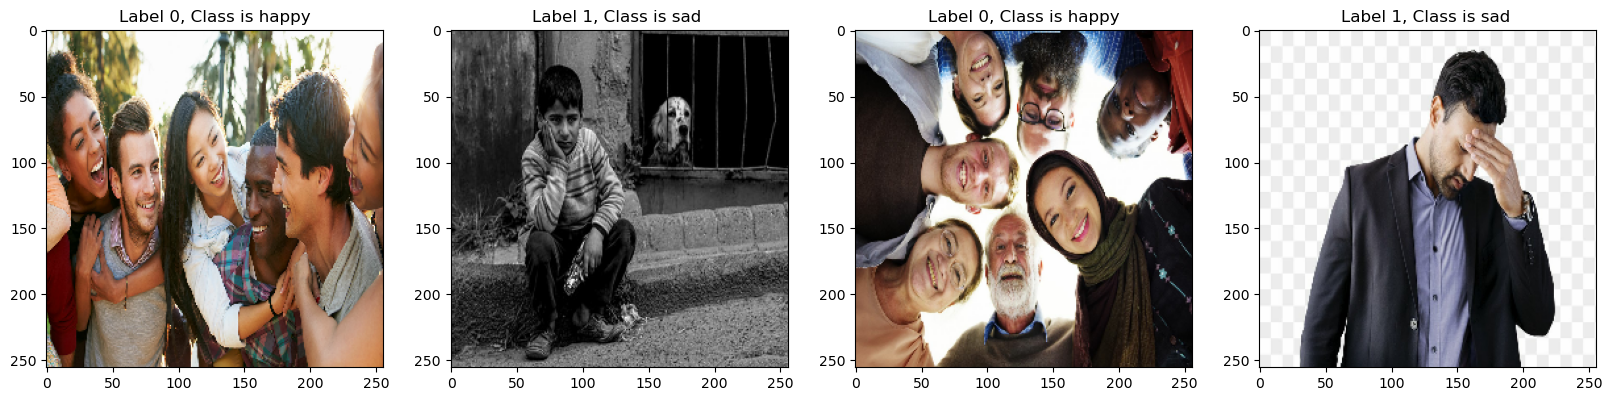

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for i , img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    if batch[1][i] == 0:
        ax[i].title.set_text("Label 0, Class is happy")
    else:
        ax[i].title.set_text("Label 1, Class is sad ")

## 4- Preprocessing images

In [ ]:
 '''
 1- scaling image values to be from 0 to 1
 2- split data to training , testing and validation 
 '''

In [38]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

### 4.1 Scale data

In [39]:
# We use data pipline 
data = data.map(lambda x,y: (x/255, y))

In [41]:
# to access data we use 
data_scaled = data.as_numpy_iterator() #return batches

In [59]:
batch_ = data_scaled.next()

In [46]:
batch_[0].min(), batch_[0].max()

(0.0, 1.0)

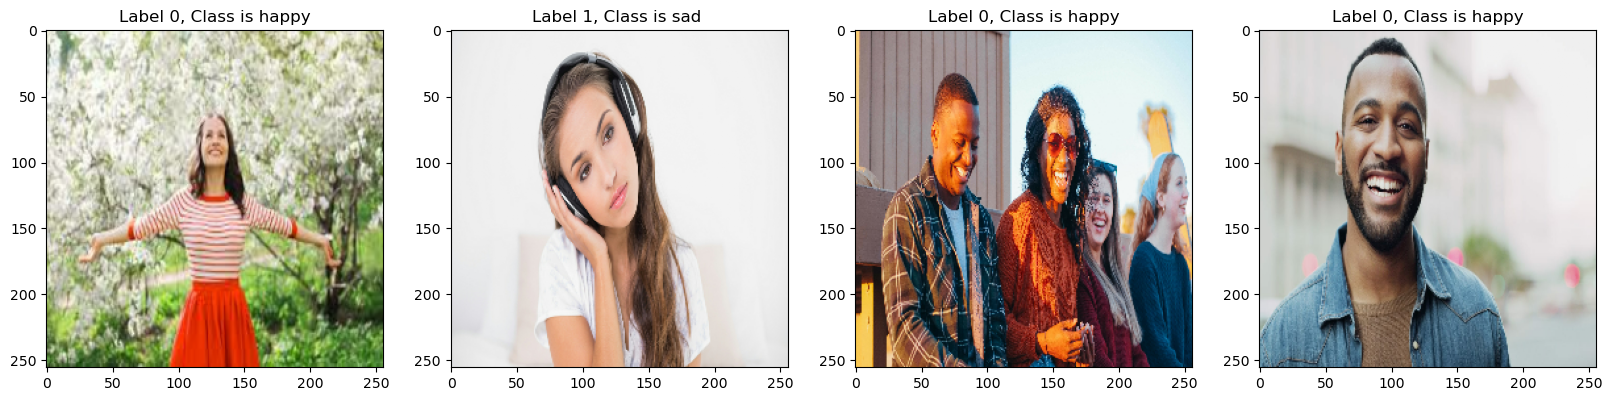

In [43]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for i , img in enumerate(batch_[0][:4]):
    ax[i].imshow(img) # dont use astype int here as values from 0-1 so all will be 0 
    if batch_[1][i] == 0:
        ax[i].title.set_text("Label 0, Class is happy")
    else:
        ax[i].title.set_text("Label 1, Class is sad ")

In [45]:
int(.8)

0

### 4.2 Split data

In [47]:
len(data) # We have 7 batches -> 195 image devided to batches each one has 32 image  

7

In [60]:
# size of last batch (7)
len(batch_[0]) 

3

In [112]:
train_size = int(len(data) * .6)
test_size = int(len(data) * .2)
val_size = int(len(data) * .2)+1

In [113]:
val_size + train_size + test_size # = 7 = data size   

7

In [114]:
train = data.take(train_size) 
test   = data.skip(train_size).take(test_size)
val  = data.skip(train_size + test_size).take(val_size)

In [125]:
len(val)

2

## 5- Deep model

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

### 5.1 Build Model


In [139]:
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256,3)),
    MaxPooling2D(),
    
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')

])

In [140]:
# Compile 
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

### 5.2 Train

In [142]:
logdir = 'logs' #file to save logs

In [143]:
'''
This line of code is setting up a callback for the TensorBoard, which is a web-based visualization tool provided with TensorFlow. The TensorBoard allows you to visualize your model's performance, inspect its architecture, and monitor metrics during training.
'''
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [144]:
history = model.fit(train, epochs=20 , validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 1.3340 - accuracy: 0.5000 - val_loss: 0.6413 - val_accuracy: 0.6000
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.7835 - accuracy: 0.5781 - val_loss: 0.5638 - val_accuracy: 0.6571
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6215 - accuracy: 0.6641 - val_loss: 0.6609 - val_accuracy: 0.8857
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6577 - accuracy: 0.7031 - val_loss: 0.6026 - val_accuracy: 0.9143
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.5732 - accuracy: 0.8203 - val_loss: 0.4755 - val_accuracy: 0.7143
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.5688 - accuracy: 0.6719 - val_loss: 0.5587 - val_accuracy: 0.7143
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.4702 - accuracy: 0.8750 - val_loss: 0.2990 - val_accuracy: 0.9143
Epoch 8/20
4/4 [=========================

In [145]:
history.history

{'loss': [1.3339629173278809,
  0.7835193872451782,
  0.6214706301689148,
  0.657721996307373,
  0.5731633305549622,
  0.5688089728355408,
  0.47024059295654297,
  0.3947790563106537,
  0.338550329208374,
  0.33624783158302307,
  0.286581814289093,
  0.2406323105096817,
  0.1794322282075882,
  0.11394684761762619,
  0.13067983090877533,
  0.07460679113864899,
  0.05000998079776764,
  0.040740568190813065,
  0.02729007415473461,
  0.015324804000556469],
 'accuracy': [0.5,
  0.578125,
  0.6640625,
  0.703125,
  0.8203125,
  0.671875,
  0.875,
  0.796875,
  0.921875,
  0.875,
  0.890625,
  0.9375,
  0.953125,
  0.953125,
  0.953125,
  0.984375,
  0.9921875,
  0.9921875,
  1.0,
  1.0],
 'val_loss': [0.6413047909736633,
  0.5638394355773926,
  0.6608964800834656,
  0.6025809049606323,
  0.4755063056945801,
  0.5587472319602966,
  0.2990099787712097,
  0.26937249302864075,
  0.6099514961242676,
  0.4122495651245117,
  0.1458895206451416,
  0.1698920875787735,
  0.09329141676425934,
  0.07564

In [146]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 5.3 Plot preformace 

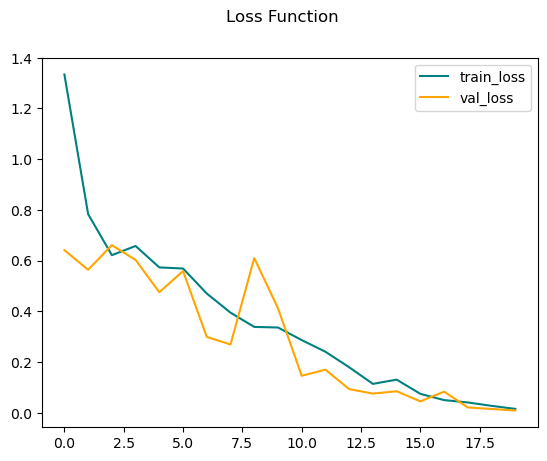

In [147]:
# Loss
fig = plt.figure()

plt.plot(history.history['loss'], color='teal', label='train_loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss Function')

plt.legend(loc='upper right')

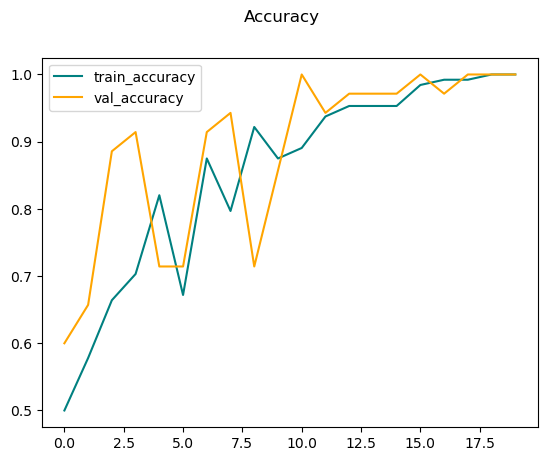

In [148]:
# Accuracy
fig = plt.figure()

plt.plot(history.history['accuracy'], color='teal', label='train_accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')

fig.suptitle('Accuracy')

plt.legend(loc='upper left')

## 6- Evaluating Perofmrnace

In [149]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [169]:
# Access test batch 
test_batch = test.as_numpy_iterator() 

In [164]:
# Get size of it 
len(test_batch.next()[0])

32

In [167]:
# Display label values 
test_batch.next()[1]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [170]:
# Separate images and labels 
X, y = test_batch.next() 

In [172]:
len(X)

32

In [173]:
yhat = model.predict(X)

1/1 [==============================] - 0s 202ms/step


In [179]:
# Take objects from out accuracy metrics
pre = Precision()
re  = Recall()
bin_ = BinaryAccuracy()

In [180]:
pre.update_state(y,yhat)
re.update_state(y,yhat)
bin_.update_state(y,yhat)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=32.0>

In [181]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, BinaryAccuracy: {bin_.result().numpy()}")

Precision: 1.0, Recall: 1.0, BinaryAccuracy: 1.0


## 7- Test 

In [224]:
def classify_img(path):
    # Read image 
    img = plt.imread(path)
    
    # Resize 
    resized = tf.image.resize(img, (256,256))
    
    # Expand and sscale image 
    scaled = np.expand_dims(resized/255, 0)
    
    #prediction 
    y_pred = model.predict(scaled)
    
    if y_pred <= .5:
        print(f"Class Happy, label 0,  {y_pred.squeeze():.6}")
    else:
        print(f"Class Sad, label 1, {y_pred.squeeze():.6}")
    
    # image show 
    plt.imshow(resized.numpy().astype(int))
    plt.show()

1/1 [==============================] - 0s 27ms/step
Class Happy, label 0,  0.274507


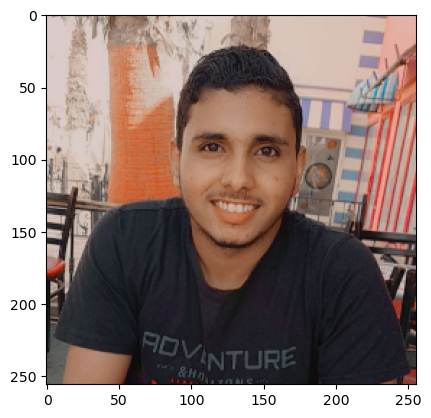

1/1 [==============================] - 0s 20ms/step
Class Happy, label 0,  0.0147604


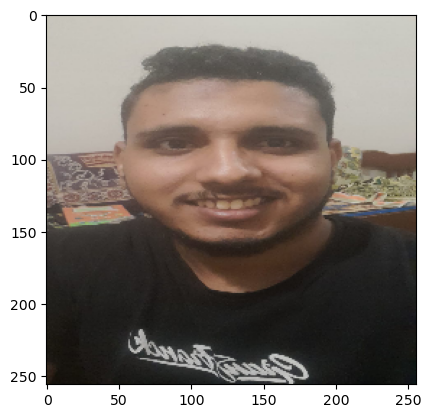

1/1 [==============================] - 0s 23ms/step
Class Sad, label 1, 0.943734


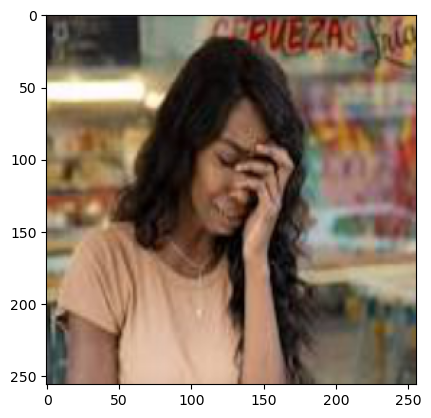

1/1 [==============================] - 0s 22ms/step
Class Sad, label 1, 0.718049


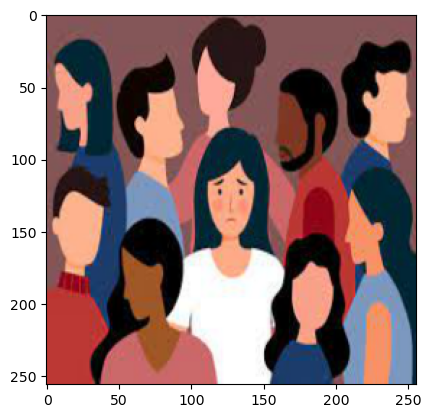

1/1 [==============================] - 0s 24ms/step
Class Sad, label 1, 0.6063


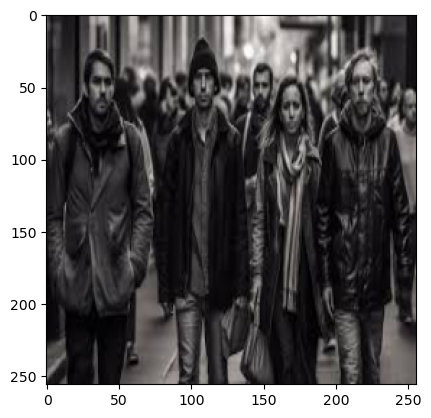

1/1 [==============================] - 0s 16ms/step
Class Happy, label 0,  0.0846488


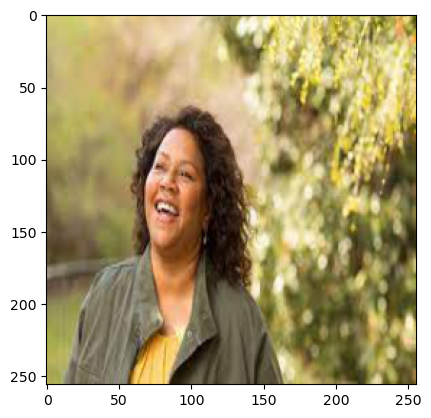

1/1 [==============================] - 0s 17ms/step
Class Happy, label 0,  0.000271999


In [225]:
paths = ['aym_h.jpg', 'ayman2jpg.jpg', 'sad.jpeg', 'sad2.jpeg', 'sad3.jpeg', 'happy1.jpeg','h5.jpeg']

for p in paths:
    classify_img(p)


## 8-  Saving and Load the Model

### 8.1 Save model 

In [228]:
model.save("model\happysad_classifier.h5")

### 8.2 Load new model

In [1]:
from tensorflow.keras.models import load_model

In [2]:
new_model = load_model("model\happysad_classifier.h5")

In [33]:
from PIL import Image
def new_classify_img(path):
    # Read image 
    img = plt.imread(path)
    
    # Resize 
    resized = tf.image.resize(img, (256,256))
    
    # Expand and sscale image 
    scaled = np.expand_dims(resized/255, 0)
    
    #prediction 
    y_pred = new_model.predict(scaled)
    
     # image show 
    processed_image = Image.open(path)
    
    if y_pred <= .5:
        output = (f"Class Happy, label 0, with rate: {y_pred.squeeze():.6}")
        return output, processed_image
    else:
        output = (f"Class Sad, label 1, with rate: {y_pred.squeeze():.6}")
        return output, processed_image
    


In [20]:
output , img = new_classify_img('aym_h.jpg')

1/1 [==============================] - 0s 24ms/step


## Model with GUI  


In [40]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk


# Function to handle the 'Browse' button click event
def browse_image():
    global image_label, text_label

    # Open a file dialog to select an image
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png *.jpg *.jpeg")])

    if file_path:
        # Process the selected image
        output , img = new_classify_img(file_path)
        processed_image = img.resize((500, 500), Image.LANCZOS)
        
        # Update the GUI with the processed image and text
        text_label.config(text=output, font=("Arial", 20))
        image_label.image = ImageTk.PhotoImage(processed_image)
        image_label.configure(image=image_label.image)
       

 # Create the main GUI window
root = tk.Tk()
root.title("Happy & Sad Image Classifier")

# Set the size of the main window
root.geometry("600x600")

# Create a 'Browse' button
browse_button = tk.Button(root, text="Browse", command=browse_image)
browse_button.pack(pady=10)

# Create a label to display the processed image
image_label = tk.Label(root)
image_label.pack()

# Create a label to display the processed text
text_label = tk.Label(root, text="Choose Image")
text_label.pack()

# Start the GUI main loop
root.mainloop()


1/1 [==============================] - 0s 21ms/step
